In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
sehwag = pd.read_csv("sehwag.csv")

In [3]:
len(sehwag)

245

In [4]:
sehwag.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Unnamed: 9,Opposition,Ground,Start Date,Unnamed: 13
0,1,5,2,0,0,50.00,7,lbw,1,NaN,v Pakistan,Mohali,1 Apr 1999,ODI # 1427
1,19,18,24,0,1,79.16,6,caught,1,NaN,v Zimbabwe,Rajkot,14 Dec 2000,ODI # 1660
2,58,62,54,8,0,107.40,6,bowled,1,NaN,v Australia,Bengaluru,25 Mar 2001,ODI # 1696
3,2,7,7,0,0,28.57,6,caught,2,NaN,v Zimbabwe,Bulawayo,27 Jun 2001,ODI # 1730
4,11,19,16,1,0,68.75,6,not out,2,NaN,v West Indies,Bulawayo,30 Jun 2001,ODI # 1731


In [5]:
mu_sehwag = sehwag["Runs"].mean()
mu_sehwag

33.76734693877551

In [6]:
sigma_sehwag = sehwag["Runs"].std().round(2)
sigma_sehwag

34.81

In [7]:
num_samples = 100
num_repititions = 10000
collect_sample_means = []
for rep in range(num_repititions):
    sample_mean = sehwag["Runs"].sample(num_samples).mean()
    collect_sample_means.append(sample_mean)

In [8]:
np.mean(collect_sample_means)

33.787354

In [9]:
np.std(collect_sample_means)

2.6855358866870502

In [10]:
sigma_sehwag/np.sqrt(num_samples)

3.4810000000000003

<AxesSubplot:ylabel='Count'>

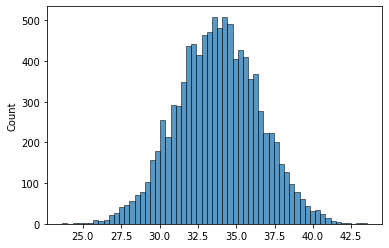

In [11]:
sns.histplot(collect_sample_means)

# Uber dataset

In [12]:
!wget "https://drive.google.com/uc?export=download&id=1NokZy4YzavFdTZlWcIUs47WW5M2A4ElE" -O Uber_dataset.zip
!unzip Uber_dataset.zip 
df_uber = pd.read_csv("uber_travel_data.csv")

In [13]:
df_uber.shape

(4542026, 5)

In [14]:
df_uber.sample(10)

,sourceid,source,dstid,destination,travel_time
2325089,149,"Bharati Road, Block C 2, Block D, New Ashok Na...",67,"63/33, Hudco Place, Andrews Ganj Extension, An...",1143
35546,3,"Unnamed Road, Mahipalpur, New Delhi",13,"10, Aurangzeb Road, New Delhi",1387
376605,22,"500 Fasil Road, Farash Khana, Chandni Chowk, N...",174,NaN,3874
4217070,265,"0 Lane Number 8, Krishan Kunj Extension Part 2...",280,"nullHastsal Road, Block A2, JJ Colony, Uttam N...",3512
936203,61,"Unnamed Road, National Zoological Park, Sundar...",17,"0 Khanna Market Road, Aliganj, Lodi Colony, Ne...",448
2652489,169,"G-9, Block F 1U, Ranikhet, Pitampura, Delhi",51,"Gali number 4, Ambedkar Colony, Dagarpur Mohal...",1476
1402567,90,"C-86, Pocket C, Okhla Phase I, Okhla Industria...",117,NaN,3161
62461,4,"P-268/3, Rock View, Delhi Cantonment, Delhi",143,"nullRoad Number 221, Pocket 1, Sector 10 Dwark...",1021
4009511,253,"0 Chaudhary Harsukh Marg, B6, Block B6, Humayu...",176,"B7-187, Pocket 7, Sector 3B, Rohini, Delhi",2753
4266265,268,"null5th Pustha Road, Block B, Bhajanpura, Shah...",229,"200 Road Number 28, Nehru Nagar, Shivaji Place...",1967


In [15]:
df_uber.value_counts(['sourceid', 'dstid']).sort_values()

sourceid  dstid
69        4        50
167       107      50
          101      50
264       14       50
167       100      50
                   ..
83        88       79
244       32       79
202       201      79
          135      79
45        170      79
Length: 70429, dtype: int64

In [16]:
data = df_uber[(df_uber["sourceid"] == 1) & (df_uber["dstid"] == 5)] ["travel_time"]
data.shape

(75,)

In [17]:
data

265    1084
266    1138
267    1129
268    1076
269    1123
       ... 
335    1155
336    1148
337    1093
338    1174
339    1161
Name: travel_time, Length: 75, dtype: int64

In [18]:
num_repititions = 10000
num_samples = 50
bootstrapped_means = []
for rep in range(num_repititions):
    bootstrapped_sample = data.sample(n=num_samples, replace=True)
    bootstrapped_means.append(np.mean(bootstrapped_sample))

In [20]:
conf_interval = np.percentile(bootstrapped_means, [2.5, 97.5])
conf_interval

array([1115.8595, 1129.62  ])

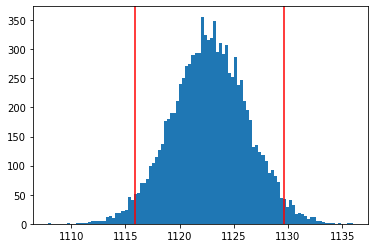

In [21]:
plt.hist(bootstrapped_means, bins=100)
plt.axvline(x=conf_interval[0], c="r")
plt.axvline(x=conf_interval[1], c="r")
plt.show()

## CLT version

In [24]:
data = df_uber[(df_uber["sourceid"] == 1) & (df_uber["dstid"] == 5)] ["travel_time"]
margin_of_error_clt = 1.96*np.std(data)/np.sqrt(len(data))
sample_mean = data.mean()
lower_lim = sample_mean - margin_of_error_clt
upper_lim = sample_mean + margin_of_error_clt

In [25]:
lower_lim, upper_lim

(1117.2644821894792, 1128.3621844771874)

# ZScore

In [26]:
stats.norm.ppf(0.975)

1.959963984540054

In [27]:
stats.norm.cdf(1.96)

0.9750021048517795

In [28]:
stats.norm.cdf(2) - stats.norm.cdf(-2)

0.9544997361036416